## Import packages

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

## Load Dataset

In [21]:
data1 = pd.read_csv('merge_stock_news_amazon.csv')
data2 = pd.read_csv('merge_stock_news_tesla.csv')
data1.loc[:,'ticker'] = 'amazon'
data2.loc[:,'ticker'] = 'tesla'
data = data1.append(data2)
#change the type of Date to Datetime
data['Date'] =pd.to_datetime(data.Date)
data = data.sort_values('Date')
data.head()

,Date,Weekday,Yesterday_pos,Yesterday_neg,Yesterday_neu,Positive,Negative,Neutral,Yesterday_price_change,Price_change,Yesterday_open,Yesterday_close,Yesterday_volume,Yesterday_high,Yesterday_low,Yesterday_Adj_close,ticker
0,2017-01-04,Wednesday,0.119593,0.042743,0.837664,0.416015,0.054345,0.529640,NaN,1.0,37.896000,37.683498,70422000,37.938000,37.384998,37.683498,amazon
0,2017-01-04,Wednesday,0.550024,0.351256,0.098720,0.394854,0.198030,0.407116,NaN,1.0,42.972000,43.397999,29616500,44.066002,42.192001,43.397999,tesla
1,2017-01-05,Thursday,0.394854,0.198030,0.407116,0.353168,0.051893,0.594939,1.0,0.0,42.950001,45.397999,56067500,45.599998,42.862000,45.397999,tesla
1,2017-01-05,Thursday,0.416015,0.054345,0.529640,0.128640,0.036761,0.834599,1.0,1.0,37.919498,37.859001,50210000,37.984001,37.709999,37.859001,amazon
2,2017-01-06,Friday,0.128640,0.036761,0.834599,0.222731,0.061406,0.715863,1.0,1.0,38.077499,39.022499,116602000,39.119999,38.013000,39.022499,amazon


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 1153
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2314 non-null   datetime64[ns]
 1   Weekday                 2314 non-null   object        
 2   Yesterday_pos           2314 non-null   float64       
 3   Yesterday_neg           2314 non-null   float64       
 4   Yesterday_neu           2314 non-null   float64       
 5   Positive                2017 non-null   float64       
 6   Negative                2017 non-null   float64       
 7   Neutral                 2017 non-null   float64       
 8   Yesterday_price_change  1804 non-null   float64       
 9   Price_change            1820 non-null   float64       
 10  Yesterday_open          2314 non-null   float64       
 11  Yesterday_close         2314 non-null   float64       
 12  Yesterday_volume        2314 non-null   int64   

In [23]:
#change the type of Date to Datetime
data['Date'] =pd.to_datetime(data.Date)
data

,Date,Weekday,Yesterday_pos,Yesterday_neg,Yesterday_neu,Positive,Negative,Neutral,Yesterday_price_change,Price_change,Yesterday_open,Yesterday_close,Yesterday_volume,Yesterday_high,Yesterday_low,Yesterday_Adj_close,ticker
0,2017-01-04,Wednesday,0.119593,0.042743,0.837664,0.416015,0.054345,0.529640,NaN,1.0,37.896000,37.683498,70422000,37.938000,37.384998,37.683498,amazon
0,2017-01-04,Wednesday,0.550024,0.351256,0.098720,0.394854,0.198030,0.407116,NaN,1.0,42.972000,43.397999,29616500,44.066002,42.192001,43.397999,tesla
1,2017-01-05,Thursday,0.394854,0.198030,0.407116,0.353168,0.051893,0.594939,1.0,0.0,42.950001,45.397999,56067500,45.599998,42.862000,45.397999,tesla
1,2017-01-05,Thursday,0.416015,0.054345,0.529640,0.128640,0.036761,0.834599,1.0,1.0,37.919498,37.859001,50210000,37.984001,37.709999,37.859001,amazon
2,2017-01-06,Friday,0.128640,0.036761,0.834599,0.222731,0.061406,0.715863,1.0,1.0,38.077499,39.022499,116602000,39.119999,38.013000,39.022499,amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,2021-12-30,Thursday,0.208069,0.167552,0.624379,0.068232,0.659719,0.272049,0.0,0.0,1098.640015,1086.189941,18718000,1104.000000,1064.140015,1086.189941,tesla
1158,2021-12-31,Friday,0.134685,0.163041,0.702274,0.244497,0.179205,0.576298,0.0,0.0,169.699997,168.644501,37584000,170.888000,168.524002,168.644501,amazon
1152,2021-12-31,Friday,0.068232,0.659719,0.272049,0.346728,0.297964,0.355307,0.0,0.0,1061.329956,1070.339966,15680300,1095.550049,1053.150024,1070.339966,tesla
1159,2022-01-01,Saturday,0.244497,0.179205,0.576298,NaN,NaN,NaN,0.0,NaN,168.955994,166.716995,47830000,169.350006,166.558502,166.716995,amazon


## Exploratory Data Analysis

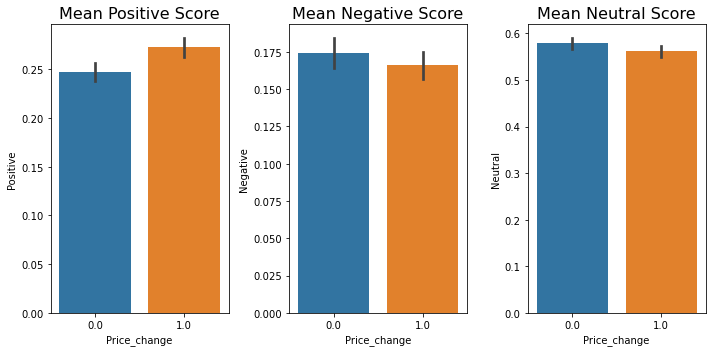

In [24]:
# Visualization of two Price_change groups [0 ,1]
grouped = data[['Price_change','Positive', 'Negative', 'Neutral']].\
               groupby('Price_change').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
sns.barplot(x='Price_change', y='Positive', data=data, ax=ax[0])
ax[0].set_title('Mean Positive Score', fontsize=16)
sns.barplot(x='Price_change', y='Negative', data=data, ax=ax[1])
ax[1].set_title('Mean Negative Score', fontsize=16)
sns.barplot(x='Price_change', y='Neutral', data=data, ax=ax[2])
ax[2].set_title('Mean Neutral Score', fontsize=16)
plt.tight_layout()
plt.show()

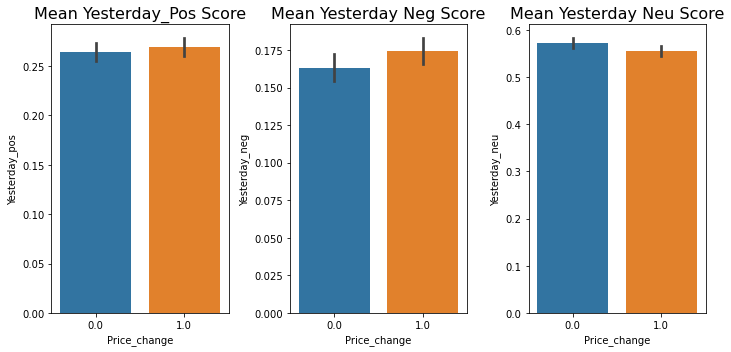

In [25]:
# Visualization of two Price_change groups [0 ,1]
grouped = data[['Price_change','Yesterday_pos', 'Yesterday_neg', 'Yesterday_neu']].\
               groupby('Price_change').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
sns.barplot(x='Price_change', y='Yesterday_pos', data=data, ax=ax[0])
ax[0].set_title('Mean Yesterday_Pos Score', fontsize=16)
sns.barplot(x='Price_change', y='Yesterday_neg', data=data, ax=ax[1])
ax[1].set_title('Mean Yesterday Neg Score', fontsize=16)
sns.barplot(x='Price_change', y='Yesterday_neu', data=data, ax=ax[2])
ax[2].set_title('Mean Yesterday Neu Score', fontsize=16)
plt.tight_layout()
plt.show()

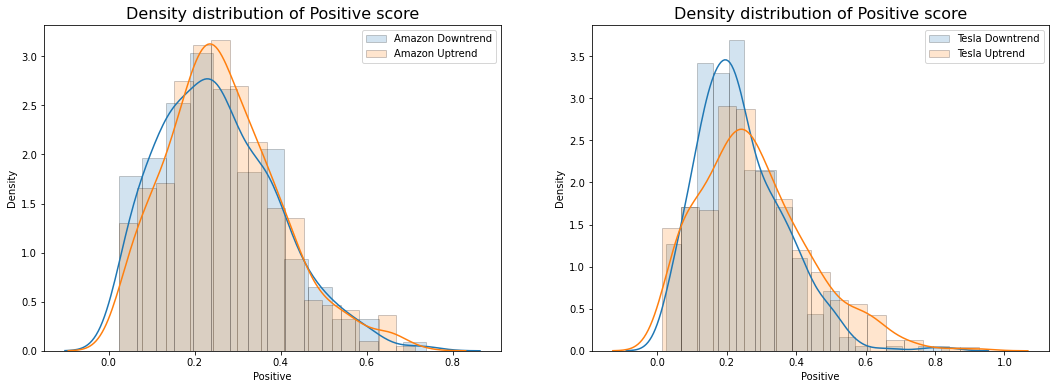

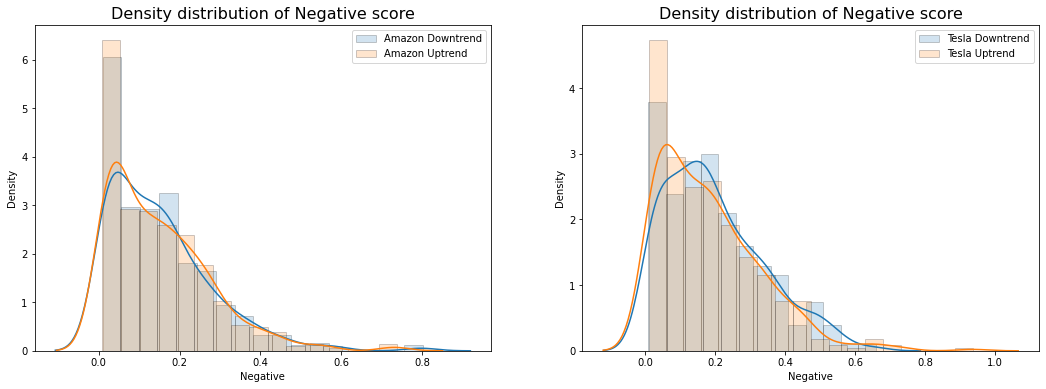

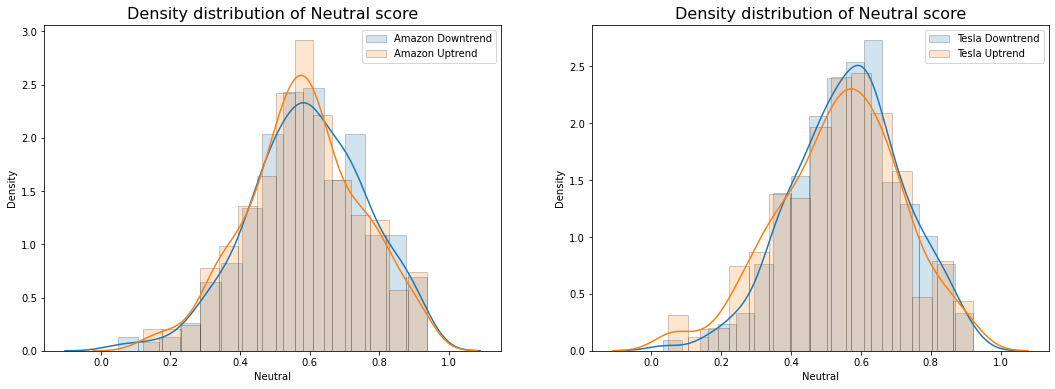

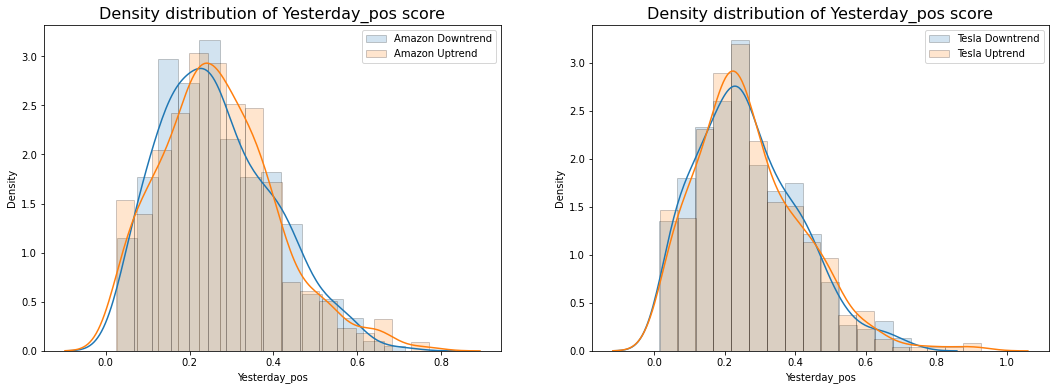

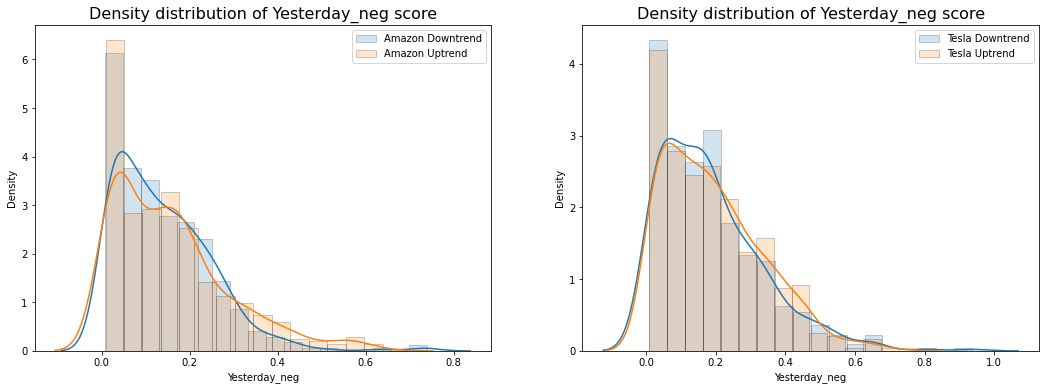

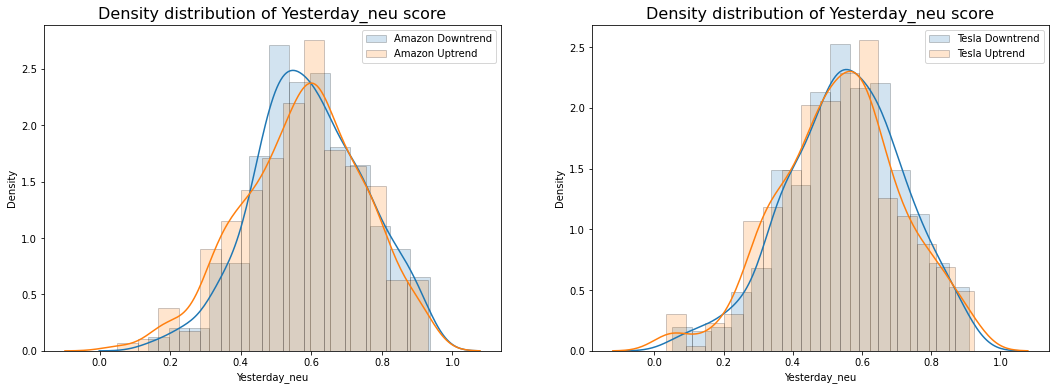

In [26]:
cols_n = ['Positive', 'Negative', 'Neutral', 'Yesterday_pos', 'Yesterday_neg', 'Yesterday_neu']
#tickers = ['amazon','tesla']
for col in cols_n:
    title1 = "Density distribution of " + col + ' score'
    title2 = "Density distribution of " + col + ' score'
    grouped = data[[col, 'Price_change']].groupby(col).mean().reset_index()
    hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    sns.distplot(data[(data['Price_change'] == 0) & (data['ticker']== 'amazon')][col], label='Amazon Downtrend', 
             ax=ax[0], hist_kws=hist_kws)
    sns.distplot(data[(data['Price_change'] == 1) & (data['ticker']== 'amazon')][col], label='Amazon Uptrend', 
             ax=ax[0], hist_kws=hist_kws)
    ax[0].set_title(title1, fontsize=16)
    ax[0].legend()
    sns.distplot(data[(data['Price_change'] == 0) & (data['ticker']== 'tesla')][col], label='Tesla Downtrend', 
             ax=ax[1], hist_kws=hist_kws)
    sns.distplot(data[(data['Price_change'] == 1) & (data['ticker']== 'tesla')][col], label='Tesla Uptrend', 
             ax=ax[1], hist_kws=hist_kws)
    ax[1].set_title(title1, fontsize=16)
    ax[1].legend()
    plt.show()